Stock Price Analyzer using ML and BigData
==

by Sun-il Kim. *2019-01-11*


**기본적인 빅데이터 머신러닝을 통한 주식 분석 예제입니다.**

>*어제에 이어 머신러닝 맛보기를 진행하겠습니다.*

>*뭔가 진행이 안되고 있다면 물어보시는게 50배 빠를 수 있습니다.*

1.SVM모델을 이용한 주식 가격 분석을 실시하세요. 
--
- 강의1) https://www.youtube.com/watch?v=SSu00IRRraY
- 강의2) https://www.youtube.com/watch?v=g8D5YL6cOSE&index=2&list=PL2-dafEMk2A7mu0bSksCGMJEmeddU_H4D
- 참고) https://github.com/mKausthub/stock-er
- 두 영상을 먼저 보시고 진행합니다. 

1-1. 필요한 CSV자료를 받아옵니다. 
--
- 예제 snap.csv -> https://drive.google.com/open?id=1lun35XsmPHaEtFmF5VbK-e9QIl5QGIo1
- 예제 aapls.csv -> https://drive.google.com/open?id=1d3gEhcHMMMjswtVpuZODj3hQmC6ms2oF
- *두 csv파일 모두 받아 .ipynb(주피터노트북 파일)이나 .py(파이썬파일) 폴더에 넣어두세요* 


- 기타) https://finance.yahoo.com/quote/ATVI/history?period1=1544367600&period2=1547046000&interval=1d&filter=history&frequency=1d
- 다른 데이터가 궁금하시면 해당 링크에서 받을 수 있습니다.
- 해당 링크는 블리자드이나, 상단에서 검색하고 기간 설정 후 Download하시면 됩니다. 

- 아직 기간은 1달정도가 적당합니다. (1년이나 10년 하시면 컴파일에 정말 10년이 걸릴 수 있습니다.)

1-3. 필요한 모듈을 설치합니다. 
--

아나콘다 프롬트에서 ***pip install {모듈이름}*** 으로 설치합니다.
- **csv** -> 보통 기본이나 가끔 기본설치만 하신 분들은 없을 수 있습니다. (말 그대로 CSV파일을 입출력하기 위해 사용됩니다.)
- **numpy** -> 기본적인 계산을 위해서 사용됩니다. 이번 경우 .reshape 을 통해 내부 데이터는 보존한 채로 형태나 차원을 바꾸는데 이용합니다. 
- **scikit-learn** -> 파이썬에서 가장 유명한 머신러닝 라이브러리입니다. 지도학습부터 각종 모델, 데이터 변환에서 전처리까지 다 하는 만능 라이브러리입니다.
- **matplotlib** -> TwitterAnalyzer에서 이야기 드렸듯, 일반적으로 그래프나 차트 등을 그리는 라이브러리입니다. 

1-4. 영상의 예제를 실습해 봅니다. 
==
```
# 주피터 노트북에서 matplotlib으로 frontend처럼 그래프를 띄우고자 하면 필요합니다.
# 없으면 그래프가 출력되지 않아 (많이) 고생하게 됩니다. 
%matplotlib inline

# 기본적인 모듈을 가져옵니다.
import csv
import numpy as np
from sklearn.svm import SVR
import matplotlib.pyplot as plt

# 데이터를 CSV파일로부터 읽어오는 함수를 정의합니다.
def get_data(filename):
    with open(filename, 'r') as csvfile:
        csvFileReader = csv.reader(csvfile)
        next(csvFileReader)
        for row in csvFileReader:
            dates.append(int(row[0].split('-')[0]))
            prices.append(float(row[1]))
    return

# 데이터를 SVR 분석하는 함수를 정의합니다 
def predict_prices(dates, prices, x):
    dates = np.reshape(dates, (len(dates), 1))
    
    # 선형
    svr_lin = SVR(kernel= 'linear', C=1e3)
    # 다항
    svr_poly = SVR(kernel = 'poly', C=1e3, degree = 2)
    # RBF
    svr_rbf = SVR(kernel='rbf', C=1e3, gamma='auto')
    
    # 데이터 훈련
    svr_lin.fit(dates, prices)
    svr_poly.fit(dates, prices)
    svr_rbf.fit(dates, prices)
    
    # 데이터 표현
    plt.scatter(dates, prices, color='black', label='Data')
    plt.plot(dates, svr_rbf.predict(dates), color='red', label='RBF model')
    plt.plot(dates, svr_lin.predict(dates), color='green', label='Linear model')
    plt.plot(dates, svr_poly.predict(dates), color='blue', label='Polynomial model')
    # 그래프 레이블링
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title('Support Vector Regression')
    plt.legend()
    plt.show()
    
    #훈련된 데이터 반환
    return svr_rbf.predict(x)[0], svr_lin.predict(x)[0], svr_poly.predict(x)[0]

# CSV 파일 지정
get_data('ATVI.csv')
# 데이터 훈련
predicted_price = predict_prices(dates, prices, 21)
# 데이터 표시
print(predicted_price)

```

1-5. 풀어볼 문제 
==

1. snaps.csv 파일과 aapls.csv 파일을 둘 다 실행해보자.
    - 왜 하나는 제대로 그래프가 표시가 안 되는가? 
2. dates = np.reshape(dates, (len(dates), 1)) 부분을 공부해보자. 
    - **.reshape**은 정확히 무엇을 하며, len(dates)가 어떻게 이용된 것인가?
    - 참고) https://www.youtube.com/watch?v=gNRADnAWCHA
   

/home/apostsik/anaconda3/envs/tf-gpu/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


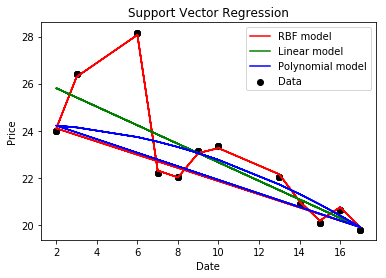

ValueError: Expected 2D array, got scalar array instead:
array=29.0.
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [6]:
%matplotlib inline
# 기본적인 모듈을 가져옵니다.
import csv
import numpy as np
from sklearn.svm import SVR
import matplotlib.pyplot as plt

# 데이터를 CSV파일로부터 읽어오는 함수를 정의합니다.
def get_data(filename):
    with open(filename, 'r') as csvfile:
        csvFileReader = csv.reader(csvfile)
        next(csvFileReader)
        for row in csvFileReader:
            dates.append(int(row[0].split('-')[0]))
            prices.append(float(row[1]))
    return

# 데이터를 SVR 분석하는 함수를 정의합니다 
def predict_prices(dates, prices, x):
    dates = np.reshape(dates, (len(dates), 1))

    # 선형
    svr_lin = SVR(kernel= 'linear', C=1e3)
    # 다항
    svr_poly = SVR(kernel = 'poly', C=1e3, degree = 2)
    # RBF
    svr_rbf = SVR(kernel='rbf', C=1e3, gamma='auto')

    # 데이터 훈련
    svr_lin.fit(dates, prices)
    svr_poly.fit(dates, prices)
    svr_rbf.fit(dates, prices)

    # 데이터 표현
    plt.scatter(dates, prices, color='black', label='Data')
    plt.plot(dates, svr_rbf.predict(dates), color='red', label='RBF model')
    plt.plot(dates, svr_lin.predict(dates), color='green', label='Linear model')
    plt.plot(dates, svr_poly.predict(dates), color='blue', label='Polynomial model')
    # 그래프 레이블링
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title('Support Vector Regression')
    plt.legend()
    plt.show()

    #훈련된 데이터 반환
    return svr_rbf.predict(x)[0], svr_lin.predict(x)[0], svr_poly.predict(x)[0]

# CSV 파일 지정
get_data('snaps.csv')
# 데이터 훈련
predicted_price = predict_prices(dates, prices, 29)
# 데이터 표시
print(predicted_price)

1-6. 개인 심화 실습 
==
더욱 변화 시켜 보세요.
- 다른 SVR 모델, 다른 Scikit-learn 내의 모듈들, 다른 그래프 등등.
  - SVC? Isotonic? Johnson-Lindenstrauss bound?
- 어제 만든 트위터 단어 분석 서비스를 결합시킬 수 있을까요? 

In [13]:
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd
# pandas_datareader 패키지의 DataReader라는 함수는 웹 상의 데이터를 DataFrame 객체로 만드는 기능을 제공합니다.
import pandas_datareader.data as web

style.use('ggplot')

start = dt.datetime(2000,1,1)
end = dt.datetime(2018,12,31)

df = web.DataReader('TSLA', 'yahoo', start, end)
print (df.head(5))

             High        Low       Open      Close    Volume  Adj Close
Date                                                                   
2010-06-29  25.00  17.540001  19.000000  23.889999  18766300  23.889999
2010-06-30  30.42  23.299999  25.790001  23.830000  17187100  23.830000
2010-07-01  25.92  20.270000  25.000000  21.959999   8218800  21.959999
2010-07-02  23.10  18.709999  23.000000  19.200001   5139800  19.200001
2010-07-06  20.00  15.830000  20.000000  16.110001   6866900  16.110001


In [14]:
print (df.tail(5))

                  High         Low        Open       Close   Volume  \
Date                                                                  
2018-12-24  314.500000  295.200012  313.500000  295.390015  5559900   
2018-12-26  326.970001  294.089996  300.000000  326.089996  8163100   
2018-12-27  322.170013  301.500000  319.839996  316.130005  8575100   
2018-12-28  336.239990  318.410004  323.100006  333.869995  9939000   
2018-12-31  339.209991  325.260010  337.790009  332.799988  6302300   

             Adj Close  
Date                    
2018-12-24  295.390015  
2018-12-26  326.089996  
2018-12-27  316.130005  
2018-12-28  333.869995  
2018-12-31  332.799988  


In [9]:
#df.to_csv('tsla.csv')

In [15]:
df = pd.read_csv('tsla.csv', parse_dates=True, index_col=0)
print(df.head(3))

             High        Low       Open      Close    Volume  Adj Close
Date                                                                   
2010-06-29  25.00  17.540001  19.000000  23.889999  18766300  23.889999
2010-06-30  30.42  23.299999  25.790001  23.830000  17187100  23.830000
2010-07-01  25.92  20.270000  25.000000  21.959999   8218800  21.959999
